## **Gradient Descent Comparison on Neural Networks**

1. Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

2. Configuration

In [4]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

TOTAL_SAMPLES = 445
TEST_SPLIT_RATIO = 0.2
NOISE_LEVEL = 0.25

EPOCHS = 100
LEARNING_RATE = 0.01

BATCH_SGD = 1
BATCH_MBGD = 32

3. Prepare Dataset

In [6]:
X, y = make_moons(n_samples=TOTAL_SAMPLES, noise=NOISE_LEVEL, random_state=SEED)

scaler = StandardScaler()  # Scale features
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=TEST_SPLIT_RATIO, random_state=SEED)  # Train-test split
N_TRAIN = X_train.shape[0]
BATCH_BGD = N_TRAIN

print(f"Training samples (N_train): {N_TRAIN}, Testing samples: {X_test.shape[0]}")
print(f"Batch sizes -> BGD: {BATCH_BGD}, MBGD: {BATCH_MBGD}, SGD: {BATCH_SGD}")

Training samples (N_train): 356, Testing samples: 89
Batch sizes -> BGD: 356, MBGD: 32, SGD: 1


4. Model Definition

In [7]:
def create_model():
    model = Sequential([
        Dense(8, activation='relu', input_shape=(2,)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = SGD(learning_rate=LEARNING_RATE)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

5. Helper Function: Decision Boundary Plot

In [8]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

6. Run Experiments: BGD, MBGD, SGD
# ----- Batch Gradient Descent -----

In [9]:
results = {}

print("Training BGD...")
model_bgd = create_model()
start_time = time.time()
history_bgd = model_bgd.fit(X_train, y_train, validation_data=(X_test, y_test),
                            epochs=EPOCHS, batch_size=BATCH_BGD, verbose=0)
end_time = time.time()
results['BGD'] = {
    'time(s)': end_time - start_time,
    'val_loss': history_bgd.history['val_loss'][-1],
    'val_accuracy': history_bgd.history['val_accuracy'][-1],
    'history': history_bgd.history
}
print(f"BGD complete in {results['BGD']['time(s)']:.2f}s")

Training BGD...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


BGD complete in 10.50s


# ----- Mini-Batch Gradient Descent -----

In [10]:
print("Training MBGD...")
model_mbgd = create_model()
start_time = time.time()
history_mbgd = model_mbgd.fit(X_train, y_train, validation_data=(X_test, y_test),
                              epochs=EPOCHS, batch_size=BATCH_MBGD, verbose=0)
end_time = time.time()
results['MBGD'] = {
    'time(s)': end_time - start_time,
    'val_loss': history_mbgd.history['val_loss'][-1],
    'val_accuracy': history_mbgd.history['val_accuracy'][-1],
    'history': history_mbgd.history
}
print(f"MBGD complete in {results['MBGD']['time(s)']:.2f}s")

Training MBGD...
MBGD complete in 18.24s


# ----- Stochastic Gradient Descent -----

In [11]:
print("Training SGD...")
model_sgd = create_model()
start_time = time.time()
history_sgd = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test),
                            epochs=EPOCHS, batch_size=BATCH_SGD, verbose=0)
end_time = time.time()
results['SGD'] = {
    'time(s)': end_time - start_time,
    'val_loss': history_sgd.history['val_loss'][-1],
    'val_accuracy': history_sgd.history['val_accuracy'][-1],
    'history': history_sgd.history
}
print(f"SGD complete in {results['SGD']['time(s)']:.2f}s")

Training SGD...
SGD complete in 102.05s


7. Visualize Training Results
# Accuracy and Loss

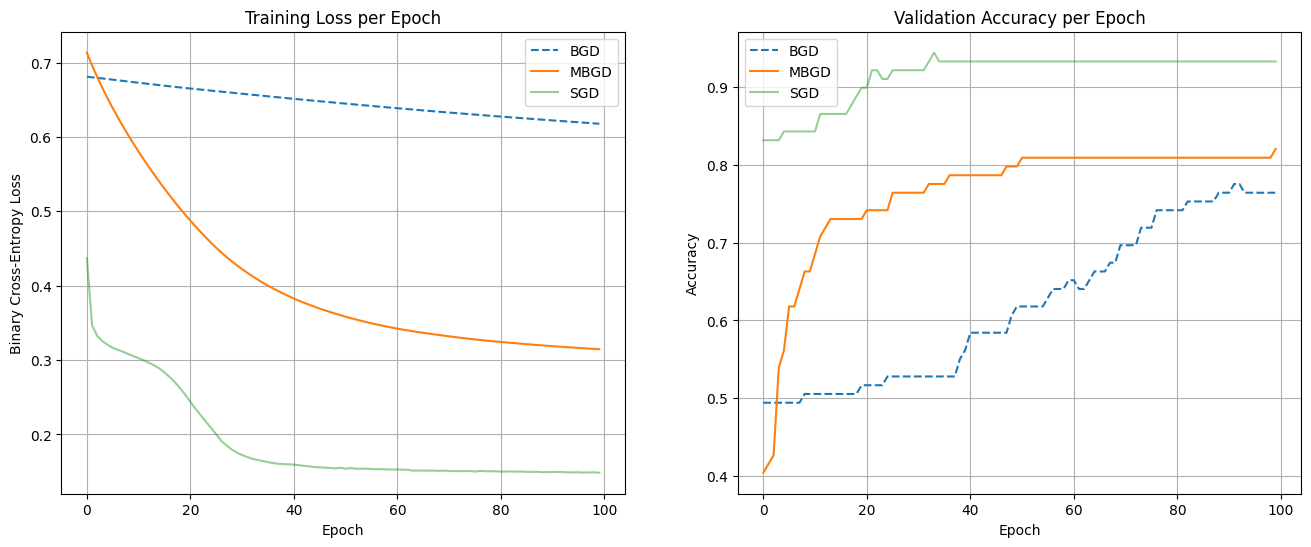

In [12]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(results['BGD']['history']['loss'], label='BGD', linestyle='--')
plt.plot(results['MBGD']['history']['loss'], label='MBGD')
plt.plot(results['SGD']['history']['loss'], label='SGD', alpha=0.5)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(results['BGD']['history']['val_accuracy'], label='BGD', linestyle='--')
plt.plot(results['MBGD']['history']['val_accuracy'], label='MBGD')
plt.plot(results['SGD']['history']['val_accuracy'], label='SGD', alpha=0.5)
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Decision Boundary Comparison

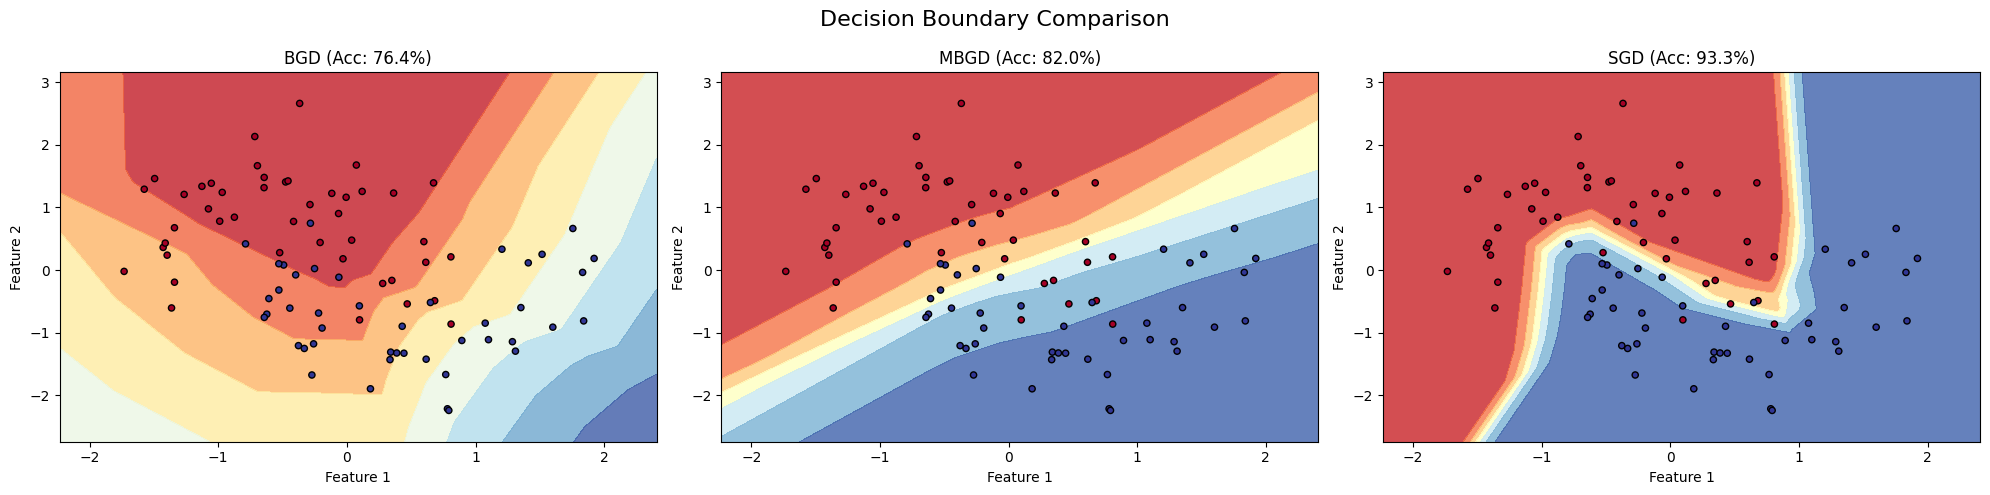

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plot_decision_boundary(model_bgd, X_test, y_test, f"BGD (Acc: {results['BGD']['val_accuracy']*100:.1f}%)")
plt.subplot(1,3,2)
plot_decision_boundary(model_mbgd, X_test, y_test, f"MBGD (Acc: {results['MBGD']['val_accuracy']*100:.1f}%)")
plt.subplot(1,3,3)
plot_decision_boundary(model_sgd, X_test, y_test, f"SGD (Acc: {results['SGD']['val_accuracy']*100:.1f}%)")
plt.suptitle("Decision Boundary Comparison", fontsize=16)
plt.tight_layout()
plt.show()

8. Results Table

In [14]:
df_results = pd.DataFrame({
    'Method': ['Batch GD', 'Mini-Batch GD', 'Stochastic GD'],
    'Batch Size': [BATCH_BGD, BATCH_MBGD, BATCH_SGD],
    'Validation Accuracy': [results['BGD']['val_accuracy'], results['MBGD']['val_accuracy'], results['SGD']['val_accuracy']],
    'Validation Loss': [results['BGD']['val_loss'], results['MBGD']['val_loss'], results['SGD']['val_loss']],
    'Runtime (s)': [results['BGD']['time(s)'], results['MBGD']['time(s)'], results['SGD']['time(s)']]
})
df_results['Validation Accuracy'] = df_results['Validation Accuracy'].apply(lambda x: f"{x*100:.2f}%")
df_results['Validation Loss'] = df_results['Validation Loss'].apply(lambda x: f"{x:.4f}")
df_results['Runtime (s)'] = df_results['Runtime (s)'].apply(lambda x: f"{x:.2f}s")
print(df_results)

          Method  Batch Size Validation Accuracy Validation Loss Runtime (s)
0       Batch GD         356              76.40%          0.6187      10.50s
1  Mini-Batch GD          32              82.02%          0.3649      18.24s
2  Stochastic GD           1              93.26%          0.1751     102.05s
